In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
#Load data
df = pd.read_csv('/content/Mall_Customers.csv')


# Data Overview:
print(df.head())
print("\n" ,df.info())
print("\n",df.describe())
print("\n" ,df.isnull().sum())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 None

        CustomerID         Age  Annual Income (k

In [4]:
df.drop(columns=['CustomerID'] , inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


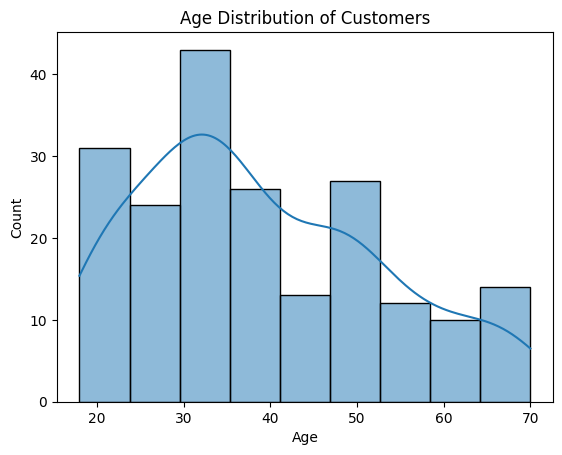

In [5]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.show()

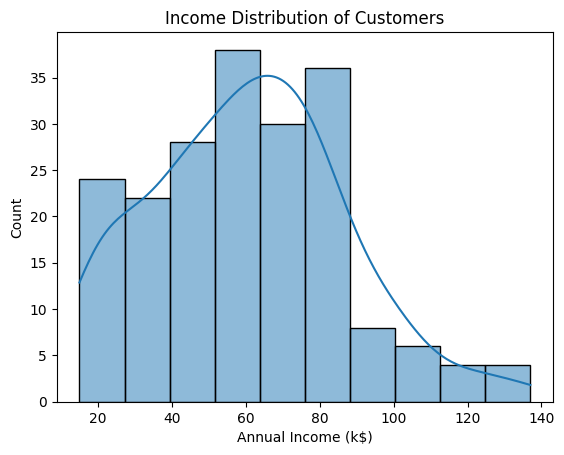

In [6]:
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Income Distribution of Customers')
plt.show()

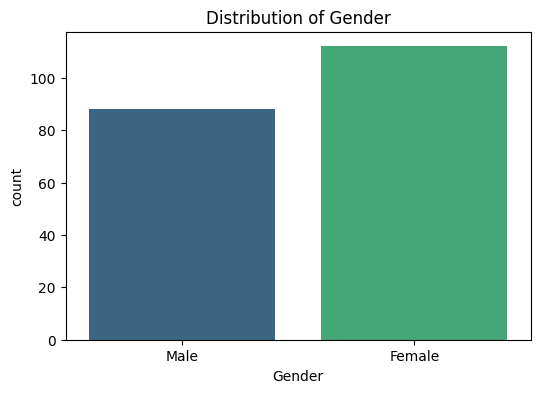

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, hue='Gender', palette='viridis', legend=False)
plt.title('Distribution of Gender')
plt.show()

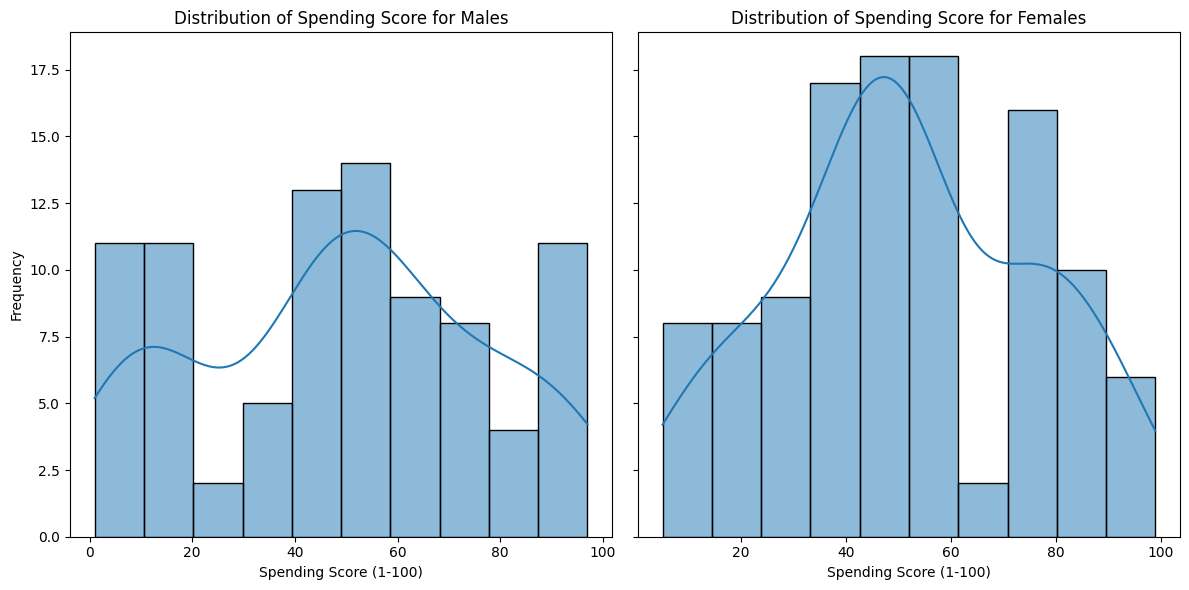

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# List of gender values and labels
genders = ['Male', 'Female']
labels = ['Males', 'Females']

for ax, gender, label in zip(axes, genders, labels):

    # Plotting the distribution
    sns.histplot(df['Spending Score (1-100)'][df['Gender'] == gender], kde=True, bins=10, ax=ax)
    ax.set_title(f'Distribution of Spending Score for {label}')
    ax.set_xlabel('Spending Score (1-100)')
    ax.set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

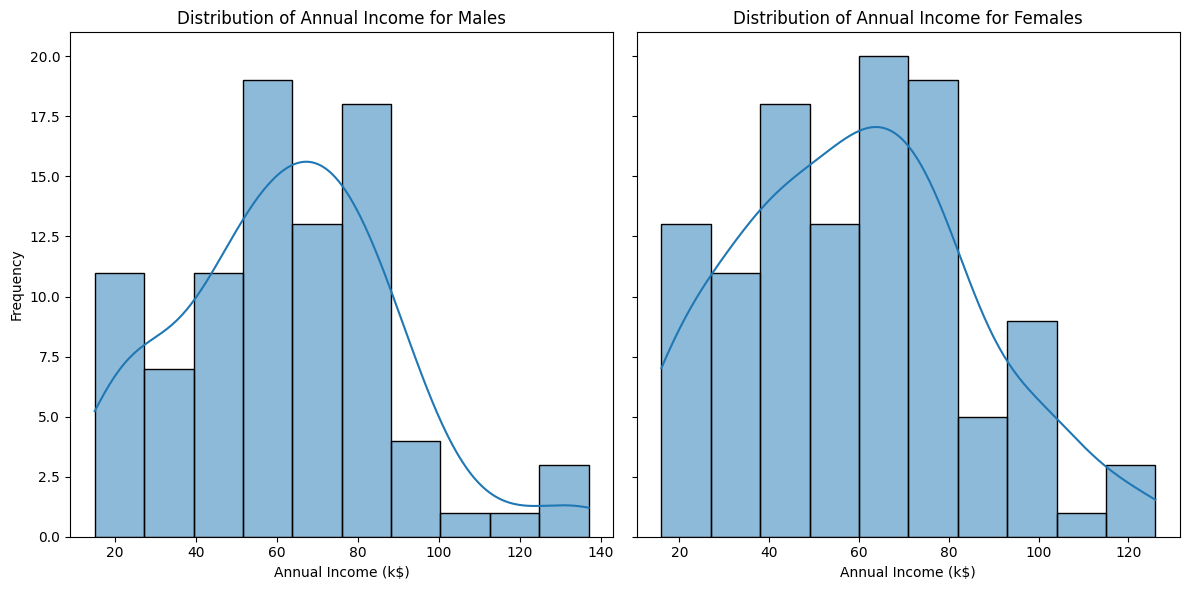

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
genders = ['Male', 'Female']
labels = ['Males', 'Females']
for ax, gender, label in zip(axes, genders, labels):
    sns.histplot(df['Annual Income (k$)'][df['Gender'] == gender], kde=True, bins=10, ax=ax)
    ax.set_title(f'Distribution of Annual Income for {label}')
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Select features for scaling
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

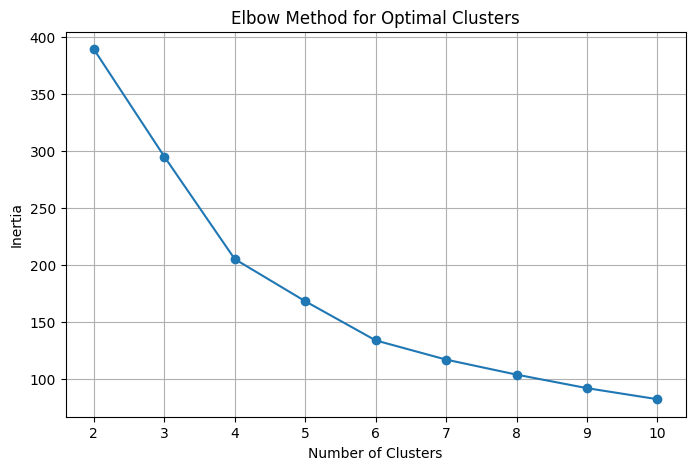

In [ ]:
# Determine Optimal Number of Clusters

# Elbow Method
cluster_range = range(2, 11)
inertias = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

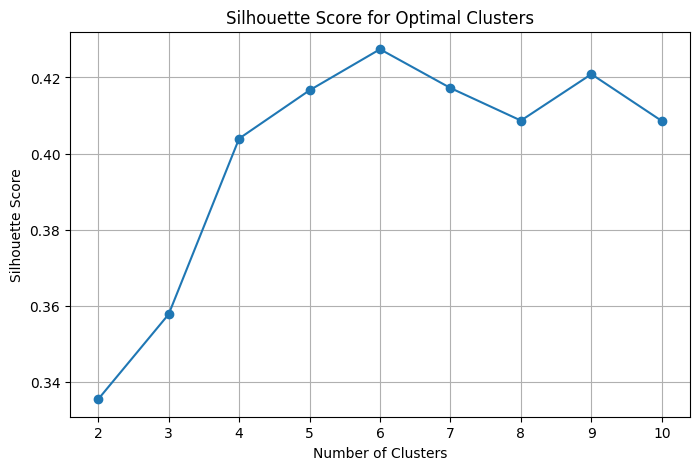

In [ ]:
# Silhouette Score
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centroids:
          Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  41.939394           88.939394               16.969697        0
1  56.333333           54.266667               49.066667        1
2  32.692308           86.538462               82.128205        2
3  26.684211           57.578947               47.789474        3
4  45.523810           26.285714               19.380952        4
5  25.250000           25.833333               76.916667        5

Cluster 0 Profile:
             Age  Annual Income (k$)  Spending Score (1-100)
count  33.000000           33.000000               33.000000
mean   41.939394           88.939394               16.969697
std    10.179450           16.586778                9.960813
min    19.000000           71.000000                1.000000
25%    36.000000           78.000000               10.000000
50%    43.000000           86.000000               16.000000
75%    47.000000           98.000000               23.000000
max    59.

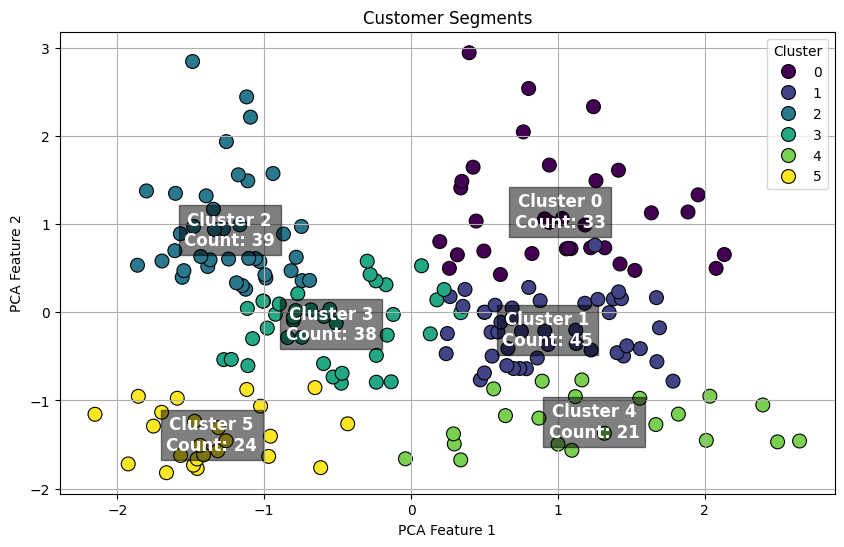

In [ ]:
# Apply K-Means with Optimal Number of Clusters
optimal_clusters = 6  # Replace with the number of clusters determined earlier

kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Interpret and Profile Each Cluster
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features.columns)
centroid_df['Cluster'] = range(optimal_clusters)
print("Cluster Centroids:\n", centroid_df)

for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Profile:")
    print(df[df['Cluster'] == cluster][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())

# Apply PCA for better visualization (optional)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1],
    hue=df['Cluster'], palette='viridis', legend='full',
    s=100, edgecolor='k'
)

plt.title('Customer Segments')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Annotate the count of each cluster
cluster_counts = df['Cluster'].value_counts()
for cluster in range(optimal_clusters):
    plt.text(
        pca_features[df['Cluster'] == cluster, 0].mean(),
        pca_features[df['Cluster'] == cluster, 1].mean(),
        f'Cluster {cluster}\nCount: {cluster_counts[cluster]}',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=12, fontweight='bold', color='white',
        bbox=dict(facecolor='black', alpha=0.5)
    )

plt.grid(True)
plt.show()

In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
1,45
2,39
3,38
0,33
5,24
4,21
